<a href="https://colab.research.google.com/github/Nahongju/EnjoyingCocktail/blob/master/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train.shape= (404, 13)
y_train.shape= (404,)
x_test.shape= (102, 13)
y_test.shape= (102,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
13/13 - 0s - loss: 77.5636 - mae: 6.7633
4/4 - 0s - loss: 93.4892 - mae: 7.4114


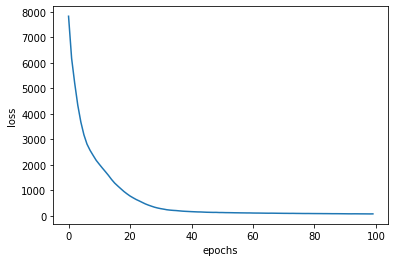

y_pred: [[ 4.670102 ]
 [23.104586 ]
 [21.295055 ]
 [21.038694 ]
 [21.482485 ]
 [18.335781 ]
 [27.727163 ]
 [25.099798 ]
 [26.451262 ]
 [23.342066 ]
 [ 4.650897 ]
 [24.352354 ]
 [23.160345 ]
 [22.115826 ]
 [19.365725 ]
 [21.759233 ]
 [13.137002 ]
 [11.804367 ]
 [23.519674 ]
 [25.145885 ]
 [23.1828   ]
 [ 0.7269649]
 [21.400204 ]
 [25.748608 ]
 [31.371275 ]
 [22.142841 ]
 [24.907951 ]
 [38.873726 ]
 [ 6.708959 ]
 [17.216856 ]
 [20.471373 ]
 [ 7.667922 ]
 [27.902218 ]
 [12.730448 ]
 [21.057526 ]
 [24.562294 ]
 [21.152445 ]
 [12.164778 ]
 [14.768411 ]
 [35.061016 ]
 [23.775734 ]
 [18.308603 ]
 [26.303732 ]
 [16.4043   ]
 [27.957241 ]
 [23.748125 ]
 [32.227787 ]
 [22.101921 ]
 [25.25489  ]
 [19.274216 ]
 [38.411636 ]
 [19.568504 ]
 [26.244392 ]
 [25.1877   ]
 [27.011425 ]
 [20.816399 ]
 [26.368893 ]
 [27.229445 ]
 [29.17696  ]
 [23.13463  ]
 [21.458385 ]
 [26.28804  ]
 [13.953816 ]
 [21.062168 ]
 [20.929518 ]
 [32.844337 ]
 [21.018251 ]
 [29.990679 ]
 [11.748585 ]
 [25.570963 ]
 [25.842325 

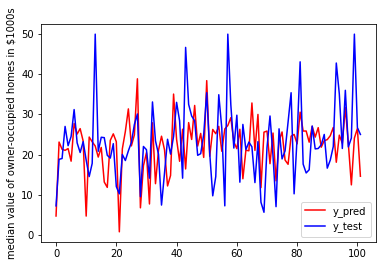

In [ ]:
# Boston_housing: 주택 가격 예측
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print("x_train.shape=", x_train.shape)
print("y_train.shape=", y_train.shape)
print("x_test.shape=", x_test.shape)
print("y_test.shape=", y_test.shape)

model = tf.keras.Sequential()

# 1: 1-layer
model.add(tf.keras.layers.Dense(units = 1, input_dim = x_train.shape[1]))             # x_train.shape[1] = 13

# 2: 3-layer
##model.add(tf.keras.layers.Dense(units = 10, input_dim = x_train.shape[1]))
##model.add(tf.keras.layers.Dense(units = 10))
##model.add(tf.keras.layers.Dense(units = 1))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])                     # mean absolute error
ret = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, verbose = 0)

train_loss = model.evaluate(x_train, y_train, verbose = 2)
test_loss = model.evaluate(x_test, y_test, verbose = 2)

loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

y_pred = model.predict(x_test)
print("y_pred:", y_pred)

plt.ylabel("median value of owner-occupied homes in $1000s")
plt.plot(y_pred, "r-", label = "y_pred")
plt.plot(y_test, "b-", label = "y_test")
plt.legend(loc = 'best')
plt.show()